<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# EDA Walkthrough

_Authors: Kiefer Katovich (SF), David Yerrington (SF), Riley Dallas (AUS)_

---

The dataset for today's lesson (`Heart.csv`) comes from the book, [An Introduction to Statistical Learning (ISLR)](http://faculty.marshall.usc.edu/gareth-james/ISL/). It's comprised of diagnostic measurements for 303 patients to determine whether or not they have heart disease (the `AHD` column).

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would use when working with a new dataset.

### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a DataFrame
- Visualize data distributions with box plots
- Calculate and visualize correlation

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Load the data

---

Import the CSV into a pandas DataFrame.

In [60]:
file_path = './datasets/Heart.csv'

In [61]:
hearts = pd.read_csv(file_path)
hearts.shape

(303, 15)

## Describe the basic format of the data and the columns

---

Use the `.head()` method (and optionally pass in an integer for the number of rows you want to see) to get a glimpse of your dataset. This is a good initial step to get a feel for what is in the CSV and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [62]:
# Print out the first 8 rows:
hearts.head(8)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


In [63]:
# Look at the dtypes of the columns:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    object 
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


## Drop unwanted columns

---

It looks like `Unnamed: 0` is an index. This is redundant, since `pandas` automatically creates an index for us (the bold numbers to the left of the DataFrame).

The `.drop()` method can be used to get rid of a column like so:

```python
df.drop(columns=['list', 'columns', 'to', 'drop'], inplace=True)
```

The `inplace=True` parameter makes our change permanent.

In [64]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
hearts.head(20)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0
8,9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,1
9,10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,1


In [65]:
# Remove the unneccesary column:
hearts.drop(columns=['Unnamed: 0'], inplace=True)

## Clean corrupted column

---

From the previous step, we noticed the `Age` column was interpreted as a string, even though the values are integers.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**What is causing the `Age` column to be encoded as a string?**

In [66]:
hearts['Age'].unique()
# There is a question mark encoded within the Age column

array(['63', '67', '37', '41', '56', '62', '57', '53', '44', '52', '48',
       '54', '49', '64', '58', '60', '50', '?', '66', '43', '40', '69',
       '59', '42', '55', '61', '65', '71', '51', '46', '45', '39', '68',
       '47', '34', '35', '29', '70', '77', '38', '74', '76'], dtype=object)

In the cell below, replace all "?" cells with `np.nan`.

In [ ]:
hearts['Age'] = [np.nan if age == '?' else int(age) for age in df['Age'].values]

In [90]:
#Alternative method
hearts['Age'].replace("?", np.nan, inplace=True)
hearts['Age'] = hearts['Age'].astype(float)

KeyError: 'Age'

## Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `Age` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing for each column.

We can count the null values for each column like so:

```python
df.isnull().sum()
```

The `.isnull()` method will convert the columns to `True` and `False` values.

The `.sum()` method will then sum these boolean columns, and the total number of null values per column will be returned.

In [77]:
hearts.isnull().sum()

Age          9
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [78]:
hearts.dropna()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63.0,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67.0,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67.0,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37.0,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41.0,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,1
298,45.0,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,1
299,68.0,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,1
300,57.0,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,1


## Make the column names more descriptive
---

One minor annoyance is that our column names are not at all intuitive. 

Let's rename them! 

To rename columns, use _dictionary substitution_ with `.rename()`. This is very useful if you only want to rename a few columns.

In [79]:
# Dictionary Method
new_columns_dict = {
    'Age': 'age',
    'Sex': 'sex_male',
    'ChestPain': 'chest_pain',
    'RestBP': 'resting_blood_pressure',
    'Chol': 'cholesterol',
    'Fbs': 'fasting_blood_sugar',
    'RestECG': 'resting_ecg',
    'MaxHR': 'max_heart_rate',
    'ExAng': 'exercise_induced_angina',
    'Oldpeak': 'old_peak',
    'Slope': 'slope',
    'Ca': 'ca',
    'Thal': 'thallium_stress_test',
    'AHD': 'has_heart_disease',
}

In [80]:
hearts.rename(columns = new_columns_dict, inplace=True)
hearts.head()

,age,sex_male,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63.0,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67.0,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67.0,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37.0,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41.0,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


## Describe the summary statistics for the columns
---

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

The `.describe()` function gives summary statistics for each of your columns. What are some, if any, oddities you notice about the columns based on this output?

In [81]:
hearts.describe()
# 303 appears a number of times in different columns, possibly an errorneous entry

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
count,294.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,54.357143,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.458746
std,9.124004,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,0.499120
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


You can also use `.groupby()` + `.describe()` for cohort analysis

In [53]:
hearts.groupby('sex_male').describe()

resting_blood_pressure                                             \
                          count        mean        std   min    25%    50%   
sex_male                                                                     
0                          97.0  133.340206  19.376149  94.0  120.0  132.0   
1                         206.0  130.912621  16.691524  94.0  120.0  130.0   

                       cholesterol              ...   ca       \
            75%    max       count        mean  ...  75%  max   
sex_male                                        ...             
0         140.0  200.0        97.0  261.752577  ...  1.0  3.0   
1         140.0  192.0       206.0  239.601942  ...  1.0  3.0   

         has_heart_disease                                               
                     count      mean       std  min  25%  50%  75%  max  
sex_male                                                                 
0                     97.0  0.257732  0.439658  0.0  0.0  0.0  1.0  1.0  
1                    206.0  0.553398  0.498352  0.0  0.0  1.0  1.0  1.0  

[2 rows x 80 columns]

## Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._
    

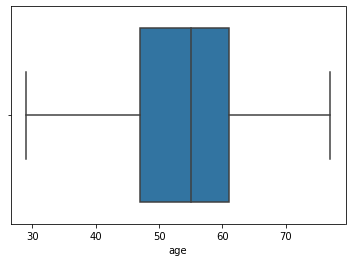

In [83]:
# age
sns.boxplot(data=hearts, x='age')
plt.show()

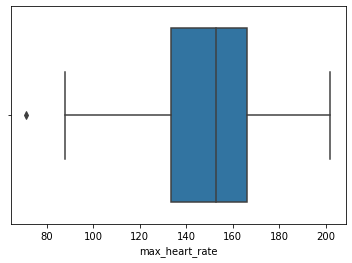

In [84]:
# max heart rate
sns.boxplot(data=hearts, x='max_heart_rate')
plt.show()

## Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### Correlation

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using the `.corr()` method.

It's useful to get a feel for which columns are correlated. The `.corr() method` can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [85]:
# A:
hearts.corr()

,age,sex_male,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
age,1.000000,-0.099631,0.285981,0.206575,0.116492,0.149542,-0.399058,0.100354,0.200340,0.164051,0.358951,0.228794
sex_male,-0.099631,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
resting_blood_pressure,0.285981,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
cholesterol,0.206575,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
fasting_blood_sugar,0.116492,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
resting_ecg,0.149542,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
max_heart_rate,-0.399058,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
exercise_induced_angina,0.100354,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
old_peak,0.200340,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510
slope,0.164051,0.037533,0.117382,-0.004062,0.059894,0.133946,-0.385601,0.257748,0.577537,1.000000,0.110119,0.339213


It can be difficult to spot any outliers simply by staring at our correlation matrix. To help get around this issue, let's use Seaborn's `.heatmap()` to give our correlation matrix some color.

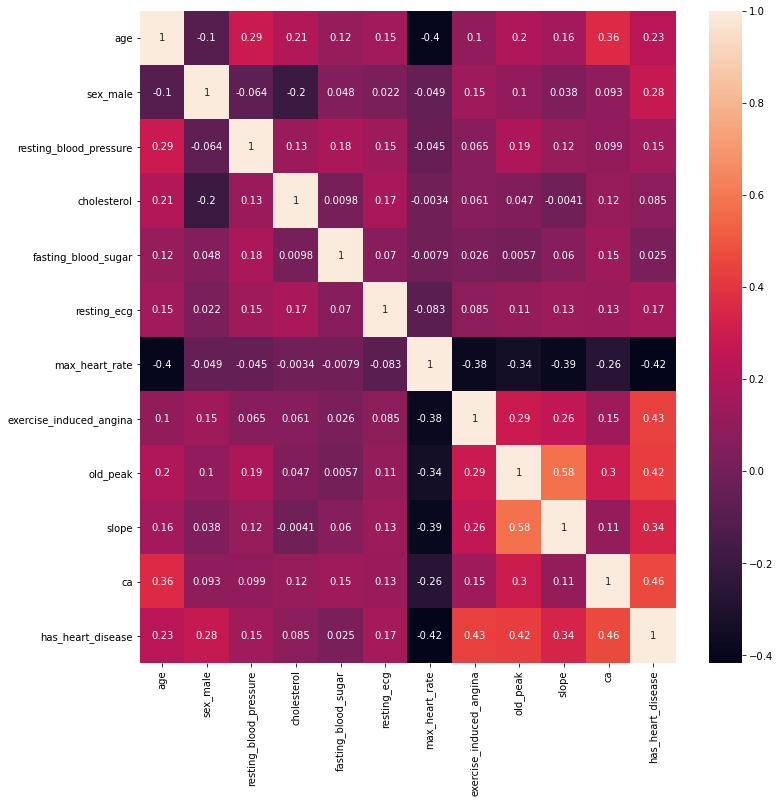

In [93]:
# A:
plt.figure(figsize = (12,12))
sns.heatmap(data=hearts.corr(), annot=True)
plt.show()